<a href="https://colab.research.google.com/github/MasoudMoeini/Neural-Networks-MLP-Using-Keras/blob/master/Prediction_Logsitic_Resgression_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df=pd.read_csv('data CSV test file.csv',delimiter=",",header=0)
df.head()


,Unnamed: 0,label,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,...,f297,f298,f299,f300,f301,f302,f303,f304,f305,f306,f307,f308,f309,f310,f311,f312,f313,f314,f315,f316,f317,f318,f319,f320,f321,f322,f323,f324,f325,f326,f327,f328,f329,f330,f331,f332,f333,f334,f335,f336
0,0,0,0.003207,0.000000,1000.000000,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.0,1000.0,1000.0,1000.0,0.157662,0.949772,0.824789,0.200697,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.00000,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,0.057701,0.774018,0.321191,0.148600,1000.000000,1000.00000,1000.000000,1000.00000,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,0.453137,0.598487,0.493430,0.026024
1,1,0,0.001602,0.006970,8.439819,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.000000,0.007436,0.769339,0.56611,0.220821,1000.0,1000.0,1000.0,1000.0,0.066814,0.772546,0.694024,0.119928,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,0.00147,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,0.052784,0.848418,0.291890,0.219181,1000.000000,1000.00000,1000.000000,1000.00000,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,0.324856,0.778154,0.580938,0.104651
2,2,0,0.004286,0.019157,3.864468,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.000000,0.072281,0.833576,0.62248,0.136329,1000.0,1000.0,1000.0,1000.0,0.018813,0.952663,0.774827,0.173763,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.00000,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,0.035057,0.833576,0.206327,0.129006,0.065716,0.71232,0.233848,0.15674,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,0.278645,0.620438,0.405717,0.060614
3,3,0,0.041829,0.123117,1000.000000,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,0.067992,0.460509,0.924223,0.79937,0.066854,1000.0,1000.0,1000.0,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.00000,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,0.004389,0.921269,0.792154,0.160846
4,4,0,0.006576,0.015534,0.968838,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.000000,0.108053,0.914346,0.71665,0.132650,1000.0,1000.0,1000.0,1000.0,0.083376,0.795097,0.632530,0.111050,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.00000,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,0.065173,0.849510,0.416093,0.212633,1000.000000,1000.00000,1000.000000,1000.00000,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,0.601719,0.810780,0.712691,0.031670


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Columns: 339 entries, Unnamed: 0 to f336
dtypes: float64(337), int64(2)
memory usage: 3.3 MB


In [16]:
df.shape

(1261, 339)

In [17]:
#df=df = pd.read_csv('data.csv', index_col=0)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,label,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,...,f297,f298,f299,f300,f301,f302,f303,f304,f305,f306,f307,f308,f309,f310,f311,f312,f313,f314,f315,f316,f317,f318,f319,f320,f321,f322,f323,f324,f325,f326,f327,f328,f329,f330,f331,f332,f333,f334,f335,f336
0,0,0.003207,0.000000,1000.000000,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.0,1000.0,1000.0,1000.0,0.157662,0.949772,0.824789,0.200697,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.00000,1000.000000,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,0.057701,0.774018,0.321191,0.148600,1000.000000,1000.00000,1000.000000,1000.00000,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,0.453137,0.598487,0.493430,0.026024
1,0,0.001602,0.006970,8.439819,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.000000,0.007436,0.769339,0.56611,0.220821,1000.0,1000.0,1000.0,1000.0,0.066814,0.772546,0.694024,0.119928,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,0.00147,0.968429,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,0.052784,0.848418,0.291890,0.219181,1000.000000,1000.00000,1000.000000,1000.00000,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,0.324856,0.778154,0.580938,0.104651
2,0,0.004286,0.019157,3.864468,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.000000,0.072281,0.833576,0.62248,0.136329,1000.0,1000.0,1000.0,1000.0,0.018813,0.952663,0.774827,0.173763,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.00000,1000.000000,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,0.035057,0.833576,0.206327,0.129006,0.065716,0.71232,0.233848,0.15674,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,0.278645,0.620438,0.405717,0.060614
3,0,0.041829,0.123117,1000.000000,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,0.067992,0.460509,0.924223,0.79937,0.066854,1000.0,1000.0,1000.0,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.00000,1000.000000,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,0.004389,0.921269,0.792154,0.160846
4,0,0.006576,0.015534,0.968838,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.000000,0.108053,0.914346,0.71665,0.132650,1000.0,1000.0,1000.0,1000.0,0.083376,0.795097,0.632530,0.111050,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.00000,1000.000000,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,0.065173,0.849510,0.416093,0.212633,1000.000000,1000.00000,1000.000000,1000.00000,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,0.601719,0.810780,0.712691,0.031670


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Columns: 338 entries, label to f336
dtypes: float64(337), int64(1)
memory usage: 3.3 MB


In [19]:
df.dropna()
df.shape

(1261, 338)

In [20]:
targets=df['label']

In [22]:
unscaled_inputs=df.drop(['label'],axis=1)

# Standardize the input data

In [23]:
from sklearn.preprocessing import StandardScaler
assingmnet_scaler=StandardScaler()
assingmnet_scaler.fit(unscaled_inputs)
scaled_inputs=assingmnet_scaler.transform(unscaled_inputs)
scaled_inputs.shape

(1261, 337)

# Splitting dataset into train & test and shuffle
We suppose 80% of input samples for training our model and 20% for test

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_inputs,targets,train_size=0.8,random_state=20)
print(x_train.shape,y_train.shape)

(1008, 337) (1008,)


# Prediction using Logistic regression¶

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
reg=LogisticRegression(max_iter=300)
reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
reg.score(x_train,y_train)

0.9305555555555556

In [27]:
reg.score(x_test,y_test)

0.9169960474308301

In [28]:
regpred=reg.predict(x_test)

# Visualization: 

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
p_pred = reg.predict_proba(x_test)
score_ = reg.score(x_test,y_test)
conf_m = confusion_matrix(y_test, regpred)
report = classification_report(y_test, regpred)

In [30]:
conf_m

array([[207,  10],
       [ 11,  25]])

In [31]:
print(classification_report(y_test, regpred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       217
           1       0.71      0.69      0.70        36

    accuracy                           0.92       253
   macro avg       0.83      0.82      0.83       253
weighted avg       0.92      0.92      0.92       253



In [32]:
len(y_test)

253

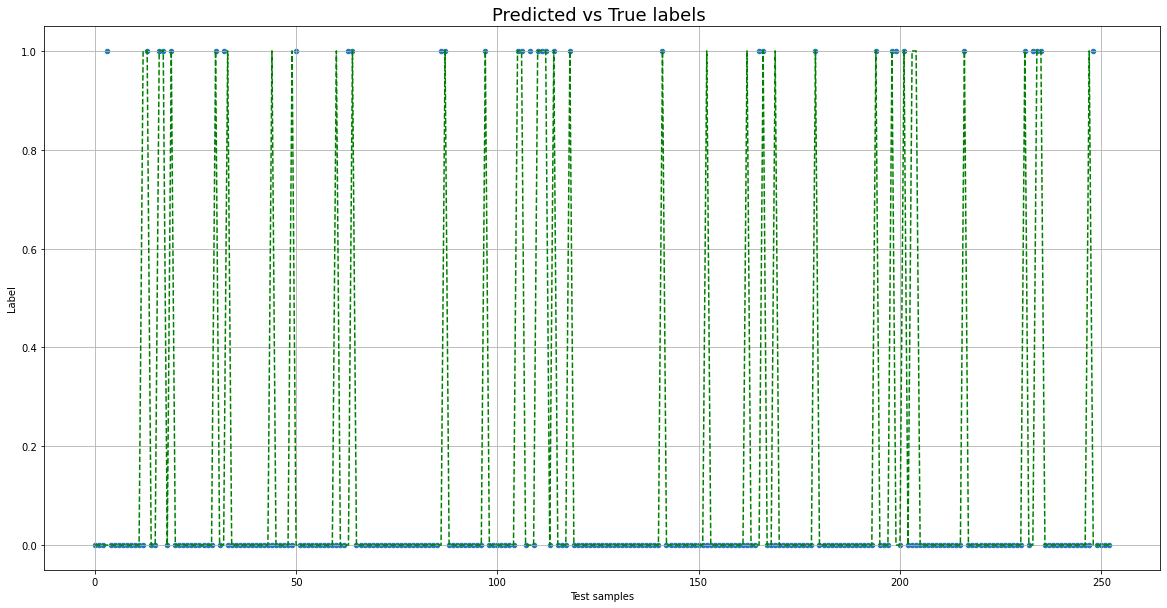

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
t=np.arange(len(y_test))
plt.figure(figsize=(20,10))
plt.ylabel('Label')
plt.xlabel('Test samples')
plt.title('Predicted vs True labels ',fontsize=18)
plt.plot(t,y_test,'g--')
plt.scatter(t,regpred,s=20)
plt.grid(True)
plt.show()

In [34]:
import pickle
with open('model','wb') as file:#the name of the file will be model, the writing method would be write bite
    pickle.dump(reg,file) 
with open('scaler','wb') as file:
    pickle.dump(assingmnet_scaler, file)

In [37]:
from keras.models import Sequential
from keras.layers import Dense
classifier = Sequential() # Initialising the ANN
classifier.add(Dense(units =337 , kernel_initializer = 'uniform', activation = 'relu', input_dim = 337))
classifier.add(Dense(units = 170, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 85, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 40, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 20, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [39]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(x_train, y_train, batch_size = 20, epochs = 100)

Epoch 1/100
51/51 [==============================] - 1s 4ms/step - loss: 0.6877 - accuracy: 0.8748
Epoch 2/100
51/51 [==============================] - 0s 4ms/step - loss: 0.3643 - accuracy: 0.8724
Epoch 3/100
51/51 [==============================] - 0s 4ms/step - loss: 0.2191 - accuracy: 0.8778
Epoch 4/100
51/51 [==============================] - 0s 4ms/step - loss: 0.1953 - accuracy: 0.8702
Epoch 5/100
51/51 [==============================] - 0s 4ms/step - loss: 0.1549 - accuracy: 0.8628
Epoch 6/100
51/51 [==============================] - 0s 4ms/step - loss: 0.1630 - accuracy: 0.8674
Epoch 7/100
51/51 [==============================] - 0s 4ms/step - loss: 0.1409 - accuracy: 0.8783
Epoch 8/100
51/51 [==============================] - 0s 4ms/step - loss: 0.1316 - accuracy: 0.9491
Epoch 9/100
51/51 [==============================] - 0s 4ms/step - loss: 0.1140 - accuracy: 0.9489
Epoch 10/100
51/51 [==============================] - 0s 4ms/step - loss: 0.1004 - accuracy: 0.9587
Epoch 11/

In [40]:
from keras.models import load_model
classifier.save('job_assignment_model.h5') #Save trained ANN

In [41]:
#prediction 
y_pred = classifier.predict(x_test)
y_pred = [ 1 if y>=0.5 else 0 for y in y_pred ]

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print("Accuracy: "+ str(accuracy*100)+"%")

[[211   6]
 [ 20  16]]
Accuracy: 89.72332015810277%
